## What is the scale of Amazon deforestation?
### An exploratory data analysis.

### Introduction

The dataset consists of 3 tables:

1)  deforested area in square km each year [2004-2019] in each of 9 states 
2)  nr of firespots each month each year [1999-2019] in each state
3)  information on appearance of El Ninio or La nina and its severity
4)  additional table with area of each state (km 2) and forested area in 2001 and 2020

Through the analysis of this dataset we want to shed light on the following issues:

1. Deforestation
        - is intensity of deforestation growing or decreasing between 2004 and 2019?
        - what is the scale and intensity of deforestation in different states?
        - is there a spatial pattern of deforestation?
2. Fires:
        - what is the behavior of fires: where and when do they occur?
        - is there a correlation between number of fires and deforestation?
3. El Nino/La Nina
        - is there an effect of climate phenomenas El Niño and La Niña on deforestation?
        - is there a correlation between climate phenomenas El Niño and La Niña and nr of fires?
 

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Cleaning and data transformation

#### FIRST TABLE with deforested area in square km each year [2004-2019] in each state

In [2]:
df_def = pd.read_csv('def_area_2004_2019.csv')
df_def

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [3]:
# Renaming columns with full names of states
df_def.columns = ['Year', 'Acre', 'Amazonas', 'Amapa', 'Maranhao','Mato Grosso','Para',\
                  'Rondonia','Roraima', 'Tocantins', 'Total_deforestation']

In [4]:
df_def = df_def.drop('Total_deforestation', axis =1)

In [5]:
# transforming data frame ('unpivot') to have states stacked in one column
df_def =df_def.melt(id_vars = ['Year'], var_name='state')

In [6]:
# renaming columns
df_def.columns = ['year', 'state','def_area']
df_def

,year,state,def_area
0,2004,Acre,728
1,2005,Acre,592
2,2006,Acre,398
3,2007,Acre,184
4,2008,Acre,254
...,...,...,...
139,2015,Tocantins,57
140,2016,Tocantins,58
141,2017,Tocantins,31
142,2018,Tocantins,25


#### SECOND TABLE with nr of firespots each month each year [1999-2019] in each state

In [7]:
df_fires = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
df_fires

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [8]:
# Changing State names to titles instead of capitalized
df_fires['state'] =df_fires['state'].str.title()

In [9]:
# Adding column with sum of firespots by year
df_fires['fires']=df_fires.groupby(['year','state'])['firespots'].transform('sum')
#yearly_fires=arr.to_frame(name ='fires')
#yearly_fires
df_fires

,year,month,state,latitude,longitude,firespots,fires
0,1999,1,Amazonas,-2.371113,-59.899933,3,1048
1,1999,1,Maranhao,-2.257395,-45.487831,36,4136
2,1999,1,Mato Grosso,-12.660633,-55.057989,18,28538
3,1999,1,Para,-2.474820,-48.546967,87,20478
4,1999,1,Rondonia,-12.861700,-60.513100,1,7121
...,...,...,...,...,...,...,...
2099,2019,12,Mato Grosso,-12.138385,-56.066297,148,17479
2100,2019,12,Para,-2.976727,-50.909316,1280,29700
2101,2019,12,Rondonia,-10.809262,-62.890452,42,11206
2102,2019,12,Roraima,2.856667,-60.431963,27,4775


In [10]:
# Reducing dataframe to only rows with yearly fires per state
df_fires.groupby('month').count()


,year,state,latitude,longitude,firespots,fires
month,,,,,,
1,169,169,169,169,169,169
2,158,158,158,158,158,158
3,153,153,153,153,153,153
4,160,160,160,160,160,160
5,169,169,169,169,169,169
6,177,177,177,177,177,177
7,183,183,183,183,183,183
8,188,188,188,188,188,188
9,189,189,189,189,189,189


In [11]:
df_fires= df_fires[df_fires.month ==9]
df_fires

,year,month,state,latitude,longitude,firespots,fires
52,1999,9,Acre,-9.829269,-68.230805,212,347
53,1999,9,Amapa,0.614518,-51.110725,4,101
54,1999,9,Amazonas,-8.000527,-64.045189,214,1048
55,1999,9,Maranhao,-4.309715,-46.404073,375,4136
56,1999,9,Mato Grosso,-11.958582,-56.094235,7357,28538
...,...,...,...,...,...,...,...
2072,2019,9,Mato Grosso,-11.215601,-56.421694,5165,17479
2073,2019,9,Para,-5.952494,-52.249601,4618,29700
2074,2019,9,Rondonia,-10.194926,-63.488670,3644,11206
2075,2019,9,Roraima,2.697000,-61.105615,26,4775


In [12]:
df_fires = df_fires.drop(['month', 'firespots'], axis=1)
df_fires

,year,state,latitude,longitude,fires
52,1999,Acre,-9.829269,-68.230805,347
53,1999,Amapa,0.614518,-51.110725,101
54,1999,Amazonas,-8.000527,-64.045189,1048
55,1999,Maranhao,-4.309715,-46.404073,4136
56,1999,Mato Grosso,-11.958582,-56.094235,28538
...,...,...,...,...,...
2072,2019,Mato Grosso,-11.215601,-56.421694,17479
2073,2019,Para,-5.952494,-52.249601,29700
2074,2019,Rondonia,-10.194926,-63.488670,11206
2075,2019,Roraima,2.697000,-61.105615,4775


In [13]:
df_fires.isnull().sum()

year         0
state        0
latitude     0
longitude    0
fires        0
dtype: int64

In [14]:
# merging dataframe with deforested area [2004-2009] with dataframe with fires [2004-2019]
df_def_fires =df_def.merge(df_fires, on = ['year','state'], how = 'left')
df_def_fires

,year,state,def_area,latitude,longitude,fires
0,2004,Acre,728,-9.835523,-68.803959,7271
1,2005,Acre,592,-9.737740,-68.922445,15993
2,2006,Acre,398,-9.225773,-69.480164,6198
3,2007,Acre,184,-9.545272,-69.254333,8549
4,2008,Acre,254,-9.331973,-69.572583,5699
...,...,...,...,...,...,...
139,2015,Tocantins,57,-6.949110,-48.549937,509
140,2016,Tocantins,58,-7.309605,-48.765383,489
141,2017,Tocantins,31,-6.950014,-48.567056,841
142,2018,Tocantins,25,-6.952400,-48.582556,281


In [15]:
df_def_fires.isnull().sum()

year         0
state        0
def_area     0
latitude     0
longitude    0
fires        0
dtype: int64

#### THIRD TABLE with information on appearance of El Ninio or La nina and its severity

In [16]:
df_nino = pd.read_csv('el_nino_la_nina_1999_2019.csv')
df_nino

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate
5,2009,2010,El Nino,Moderate
6,2015,2016,El Nino,Very Strong
7,2000,2001,La Nina,Weak
8,2005,2006,La Nina,Weak
9,2008,2009,La Nina,Weak


In [17]:
# Replacing categorical variable 'Severity' with ordered numbers
df_nino['severity'] = df_nino['severity'].replace(['Very Strong','Strong','Moderate','Weak'],
                        [4,3,2,1])
df_nino

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,1
1,2006,2007,El Nino,1
2,2014,2015,El Nino,1
3,2018,2019,El Nino,1
4,2002,2003,El Nino,2
5,2009,2010,El Nino,2
6,2015,2016,El Nino,4
7,2000,2001,La Nina,1
8,2005,2006,La Nina,1
9,2008,2009,La Nina,1


In [18]:

df_nino.groupby('phenomenon').count()

,start year,end year,severity
phenomenon,,,
El Nino,7,7,7
La Nina,9,9,9


In [19]:
df_nino =df_nino.sort_values('phenomenon')

In [20]:
# Transforming severity values for La Ninia to negative values to distinguis the influence of 
# humidity with La Nina from dryness of El Nino
df_nino.iloc[7:,3] *= -1
df_nino

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,1
1,2006,2007,El Nino,1
2,2014,2015,El Nino,1
3,2018,2019,El Nino,1
4,2002,2003,El Nino,2
5,2009,2010,El Nino,2
6,2015,2016,El Nino,4
7,2000,2001,La Nina,-1
8,2005,2006,La Nina,-1
9,2008,2009,La Nina,-1


In [21]:
# Merging all three dataframes into one dataframe
df_all =df_def_fires.merge(df_nino, left_on='year', right_on='start year', how ='left')
df_all

,year,state,def_area,latitude,longitude,fires,start year,end year,phenomenon,severity
0,2004,Acre,728,-9.835523,-68.803959,7271,2004.0,2005.0,El Nino,1.0
1,2005,Acre,592,-9.737740,-68.922445,15993,2005.0,2006.0,La Nina,-1.0
2,2006,Acre,398,-9.225773,-69.480164,6198,2006.0,2007.0,El Nino,1.0
3,2007,Acre,184,-9.545272,-69.254333,8549,2007.0,2008.0,La Nina,-3.0
4,2008,Acre,254,-9.331973,-69.572583,5699,2008.0,2009.0,La Nina,-1.0
...,...,...,...,...,...,...,...,...,...,...
139,2015,Tocantins,57,-6.949110,-48.549937,509,2015.0,2016.0,El Nino,4.0
140,2016,Tocantins,58,-7.309605,-48.765383,489,2016.0,2017.0,La Nina,-1.0
141,2017,Tocantins,31,-6.950014,-48.567056,841,2017.0,2018.0,La Nina,-1.0
142,2018,Tocantins,25,-6.952400,-48.582556,281,2018.0,2019.0,El Nino,1.0


In [22]:
# checking for missing values
df_all.isnull().sum()

year           0
state          0
def_area       0
latitude       0
longitude      0
fires          0
start year    27
end year      27
phenomenon    27
severity      27
dtype: int64

In [23]:
df_all[df_all.isnull().any(axis=1)]

,year,state,def_area,latitude,longitude,fires,start year,end year,phenomenon,severity
8,2012,Acre,305,-9.259102,-69.990269,4720,NaN,NaN,NaN,NaN
9,2013,Acre,221,-9.429270,-69.807078,4980,NaN,NaN,NaN,NaN
15,2019,Acre,688,-9.508821,-69.634697,6802,NaN,NaN,NaN,NaN
24,2012,Amazonas,523,-6.870559,-63.915696,9114,NaN,NaN,NaN,NaN
25,2013,Amazonas,583,-6.443141,-63.947691,6512,NaN,NaN,NaN,NaN
31,2019,Amazonas,1421,-6.889662,-64.389371,12665,NaN,NaN,NaN,NaN
40,2012,Amapa,27,1.755081,-51.155439,2518,NaN,NaN,NaN,NaN
41,2013,Amapa,23,1.034294,-51.108992,1529,NaN,NaN,NaN,NaN
47,2019,Amapa,8,1.152261,-51.069623,1272,NaN,NaN,NaN,NaN
56,2012,Maranhao,269,-4.528343,-46.150702,6919,NaN,NaN,NaN,NaN


In [24]:
# Replacing missing values in years where there was neither La Nina or El Nino observed
# with None for "phenomenon", 0 for "severity", "year" for "start year" and "year"+1 for "end year"
df_all['phenomenon'].fillna('None', inplace = True)
df_all['severity'].fillna('0', inplace = True)
df_all['severity'].fillna('0', inplace = True)
df_all['start year'].fillna(df_all['year'], inplace=True)
df_all['end year'].fillna(df_all['year']+1, inplace=True)
df_all

,year,state,def_area,latitude,longitude,fires,start year,end year,phenomenon,severity
0,2004,Acre,728,-9.835523,-68.803959,7271,2004.0,2005.0,El Nino,1.0
1,2005,Acre,592,-9.737740,-68.922445,15993,2005.0,2006.0,La Nina,-1.0
2,2006,Acre,398,-9.225773,-69.480164,6198,2006.0,2007.0,El Nino,1.0
3,2007,Acre,184,-9.545272,-69.254333,8549,2007.0,2008.0,La Nina,-3.0
4,2008,Acre,254,-9.331973,-69.572583,5699,2008.0,2009.0,La Nina,-1.0
...,...,...,...,...,...,...,...,...,...,...
139,2015,Tocantins,57,-6.949110,-48.549937,509,2015.0,2016.0,El Nino,4.0
140,2016,Tocantins,58,-7.309605,-48.765383,489,2016.0,2017.0,La Nina,-1.0
141,2017,Tocantins,31,-6.950014,-48.567056,841,2017.0,2018.0,La Nina,-1.0
142,2018,Tocantins,25,-6.952400,-48.582556,281,2018.0,2019.0,El Nino,1.0


In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        144 non-null    int64  
 1   state       144 non-null    object 
 2   def_area    144 non-null    int64  
 3   latitude    144 non-null    float64
 4   longitude   144 non-null    float64
 5   fires       144 non-null    int64  
 6   start year  144 non-null    float64
 7   end year    144 non-null    float64
 8   phenomenon  144 non-null    object 
 9   severity    144 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 11.4+ KB


In [26]:
# replacing floats with integer values
df_all[['fires', 'start year','end year', 'severity']] = df_all[['fires', 'start year','end year', 'severity']].astype(int)
df_all

,year,state,def_area,latitude,longitude,fires,start year,end year,phenomenon,severity
0,2004,Acre,728,-9.835523,-68.803959,7271,2004,2005,El Nino,1
1,2005,Acre,592,-9.737740,-68.922445,15993,2005,2006,La Nina,-1
2,2006,Acre,398,-9.225773,-69.480164,6198,2006,2007,El Nino,1
3,2007,Acre,184,-9.545272,-69.254333,8549,2007,2008,La Nina,-3
4,2008,Acre,254,-9.331973,-69.572583,5699,2008,2009,La Nina,-1
...,...,...,...,...,...,...,...,...,...,...
139,2015,Tocantins,57,-6.949110,-48.549937,509,2015,2016,El Nino,4
140,2016,Tocantins,58,-7.309605,-48.765383,489,2016,2017,La Nina,-1
141,2017,Tocantins,31,-6.950014,-48.567056,841,2017,2018,La Nina,-1
142,2018,Tocantins,25,-6.952400,-48.582556,281,2018,2019,El Nino,1


#### FOURTH ADDITIONAL TABLE with area of each state (km 2), forested area in 2001 and 2020
#### data form: https://rainforests.mongabay.com/brazil/


In [27]:
df_area= pd.read_csv('state_area_plus_country.csv')
df_area

,country,state,total_area,primary_forest_area_2001,primary_forest_area_2020
0,Brazil,Acre,164123,135056.90,125834.18
1,Brazil,Amapa,142829,109346.45,107922.68
2,Brazil,Amazonas,1559159,1434851.83,1412174.83
3,Brazil,Maranhao,331937,31857.32,24831.53
4,Brazil,Mato_Grosso,903366,390096.45,316969.53
5,Brazil,Para,1247955,922258.96,835769.73
6,Brazil,Rondonia,237591,156495.78,124705.63
7,Brazil,Roraima,224301,154257.59,146837.38
8,Brazil,Tocantins,277721,11949.96,9956.71


In [28]:
# Changing column names, rounding and changing type from float to integer
df_area['state']= df_area['state'].str.replace('Mato_Grosso', 'Mato Grosso')
df_area.columns =['country', 'state', 'total_area', 'forest_area_2001', 'forest_area_2020']
df_area['forest_area_2001'] =round(df_area['forest_area_2001'])
df_area['forest_area_2020'] =round(df_area['forest_area_2020'])
df_area[['forest_area_2001','forest_area_2020']] = df_area[['forest_area_2001','forest_area_2020']].astype(int)
df_area

,country,state,total_area,forest_area_2001,forest_area_2020
0,Brazil,Acre,164123,135057,125834
1,Brazil,Amapa,142829,109346,107923
2,Brazil,Amazonas,1559159,1434852,1412175
3,Brazil,Maranhao,331937,31857,24832
4,Brazil,Mato Grosso,903366,390096,316970
5,Brazil,Para,1247955,922259,835770
6,Brazil,Rondonia,237591,156496,124706
7,Brazil,Roraima,224301,154258,146837
8,Brazil,Tocantins,277721,11950,9957


### Exploratory Data Analysis

#### Deforestation

In [29]:
# Calculating percent of forested area in each state, area of deforestation between 2001-2020,
# and percent of deforested area in comparison to forest coverage in 2001
df_area['forest_2001_percent']= round(((df_area['forest_area_2001']/ df_area['total_area'])*100),1)
df_area['deforested_2001_2020']= df_area['forest_area_2001']- df_area['forest_area_2020']
df_area['deforested_percent']= round((df_area['deforested_2001_2020']/df_area['forest_area_2001'])*100,1)
df_area

,country,state,total_area,forest_area_2001,forest_area_2020,forest_2001_percent,deforested_2001_2020,deforested_percent
0,Brazil,Acre,164123,135057,125834,82.3,9223,6.8
1,Brazil,Amapa,142829,109346,107923,76.6,1423,1.3
2,Brazil,Amazonas,1559159,1434852,1412175,92.0,22677,1.6
3,Brazil,Maranhao,331937,31857,24832,9.6,7025,22.1
4,Brazil,Mato Grosso,903366,390096,316970,43.2,73126,18.7
5,Brazil,Para,1247955,922259,835770,73.9,86489,9.4
6,Brazil,Rondonia,237591,156496,124706,65.9,31790,20.3
7,Brazil,Roraima,224301,154258,146837,68.8,7421,4.8
8,Brazil,Tocantins,277721,11950,9957,4.3,1993,16.7


Map Charts made in Tableau showing:
1) primary forest coverage in each state in 2001
2) percent of deforested area till 2020 
3) deforested area till 2020

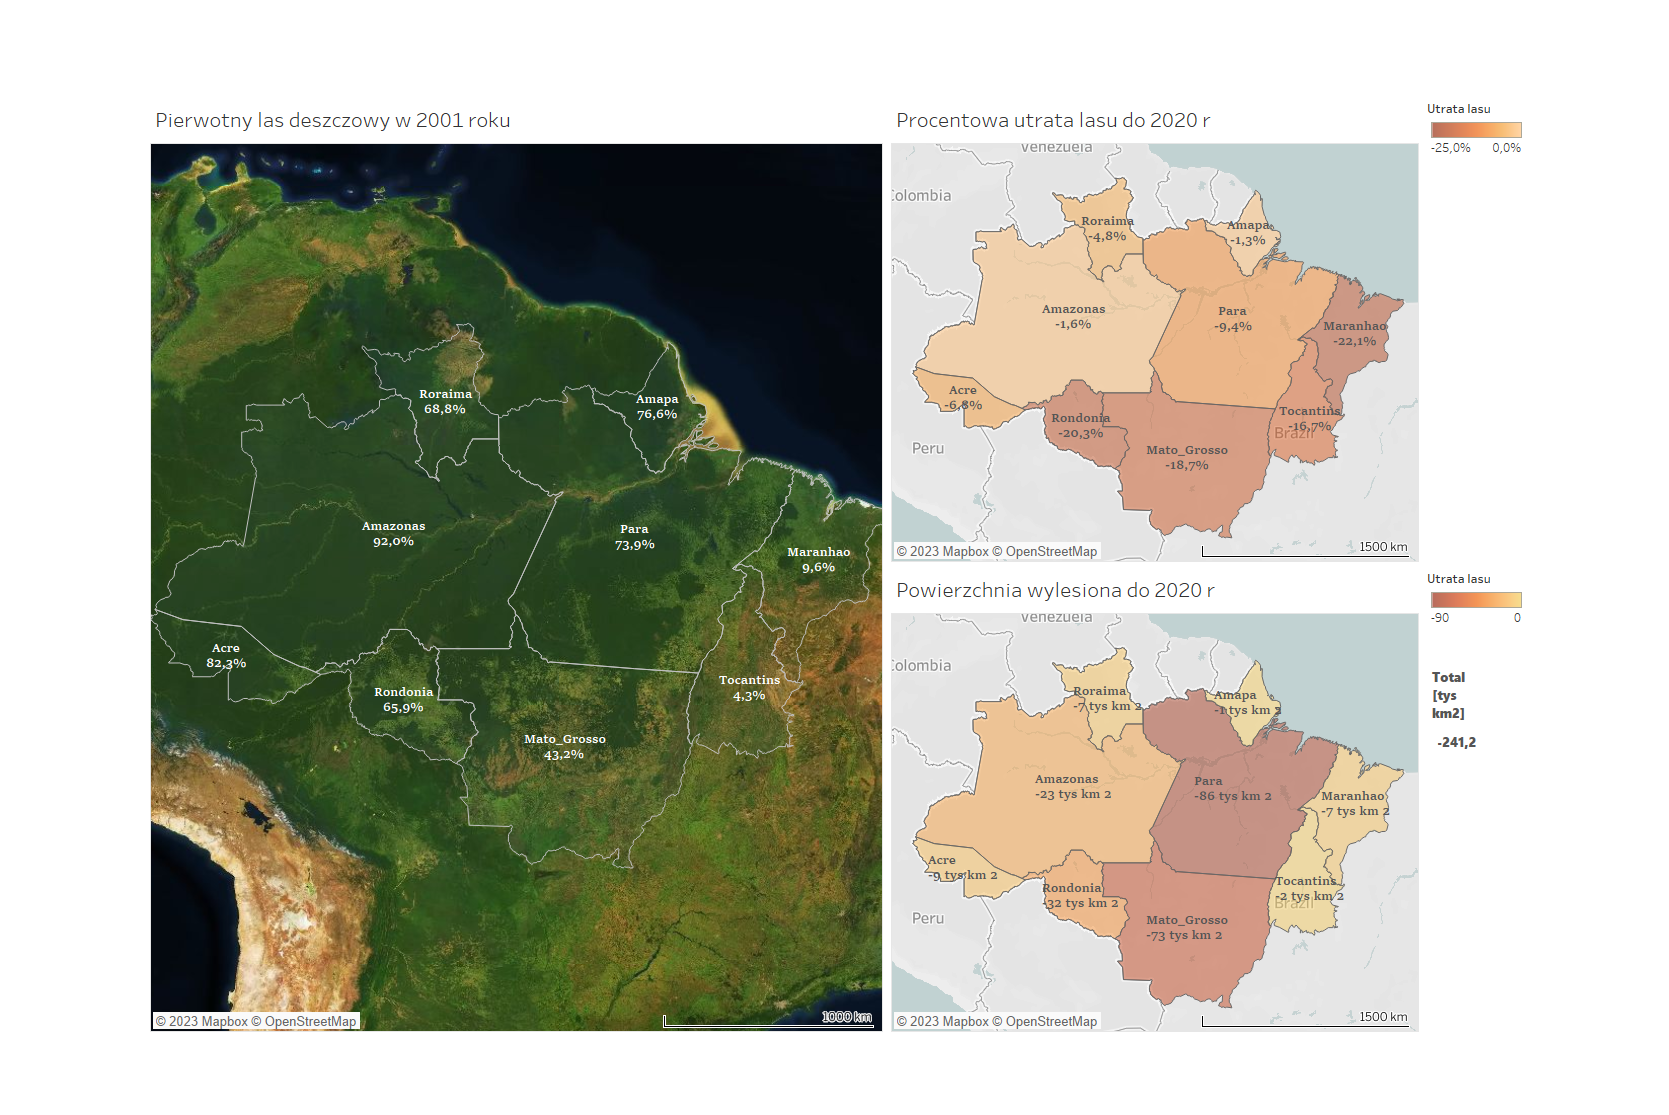

#### Insights:
- loss of 240 000 km 2 of primary forest during 20 years
- most intense deforestation in Para, Mato Grosso, Rondonia, Amazonas
- deforestation creeping from the south

In [30]:
grouped = df_all.groupby('year')['def_area'].sum()
grouped

year
2004    27772
2005    19014
2006    14286
2007    11651
2008    12911
2009     7464
2010     7000
2011     6418
2012     4571
2013     5891
2014     5012
2015     6207
2016     7893
2017     6947
2018     7536
2019     9762
Name: def_area, dtype: int64

In [31]:
cumulative =grouped.cumsum(axis=0)
cumulative

year
2004     27772
2005     46786
2006     61072
2007     72723
2008     85634
2009     93098
2010    100098
2011    106516
2012    111087
2013    116978
2014    121990
2015    128197
2016    136090
2017    143037
2018    150573
2019    160335
Name: def_area, dtype: int64

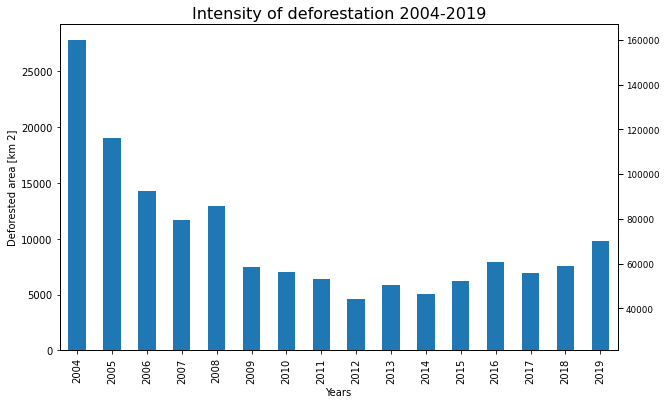

In [32]:
# plot of total deforestation each year
fig, ax = plt.subplots(figsize=(10,6))
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":15})
grouped.plot(kind='bar', y='def_area', title='Intensity of deforestation 2004-2019',ax=ax, xlabel ='Years', ylabel = 'Deforested area [km 2]', fontsize = 10)
ax2 = ax.twinx()
cumulative.plot(kind ='line', secondary_y = True, ax=ax2)
plt.show()

<AxesSubplot: >

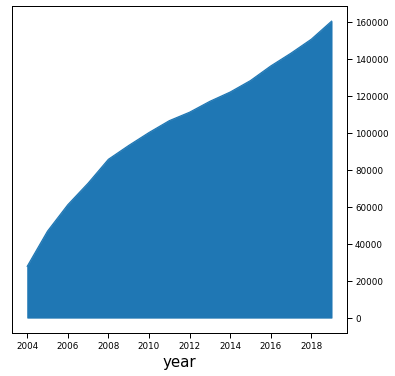

In [33]:
fig, ax = plt.subplots(figsize=(6,6))
cumulative.plot(kind ='area', secondary_y = True)

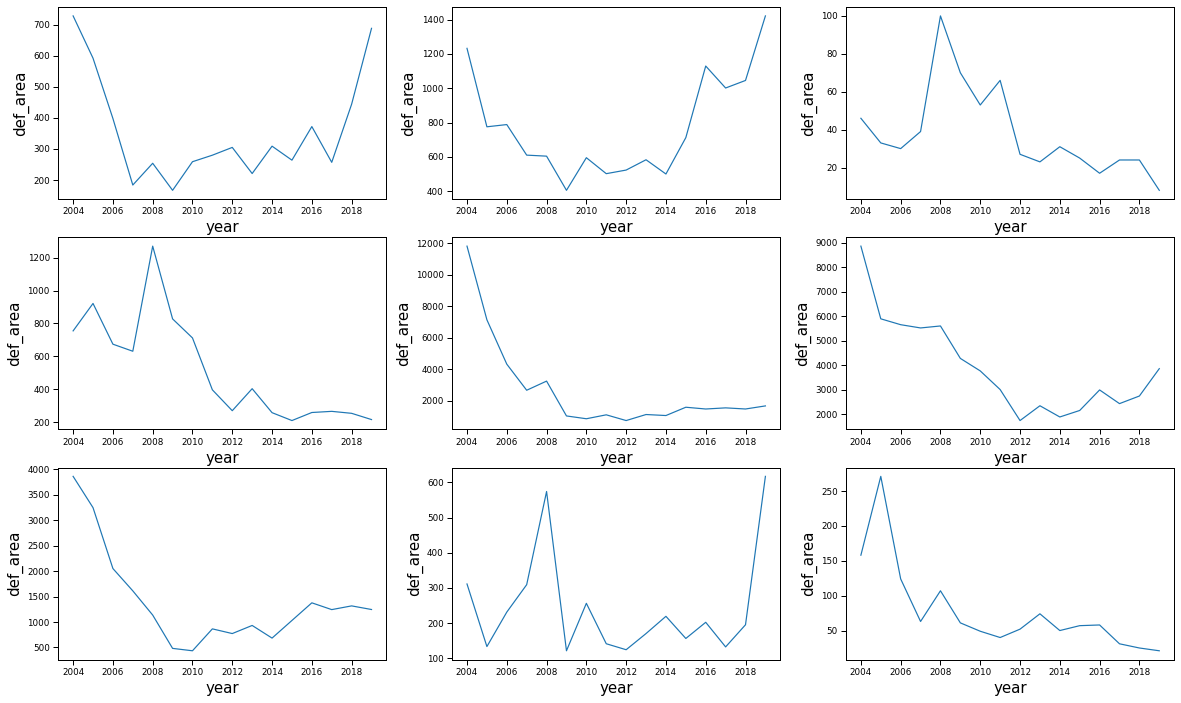

In [47]:
values = ['Acre', 'Amazonas', 'Amapa', 'Maranhao','Mato Grosso','Para',\
                  'Rondonia','Roraima', 'Tocantins']

plt.figure(figsize=(20,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.lineplot(data = df_all[df_all["state"] == values[i]], x='year', y='def_area')
    #set_ylabel(values[i],fontsize=20)
    #axes.set_title(values[i],fontsize=50)
plt.show()


Charts made in Tableau showing:
1) intensity of total deforestation each year between 2004-2019 and cumulative total deforestation
2) intensity of deforestation in each region each year between 2004-2019


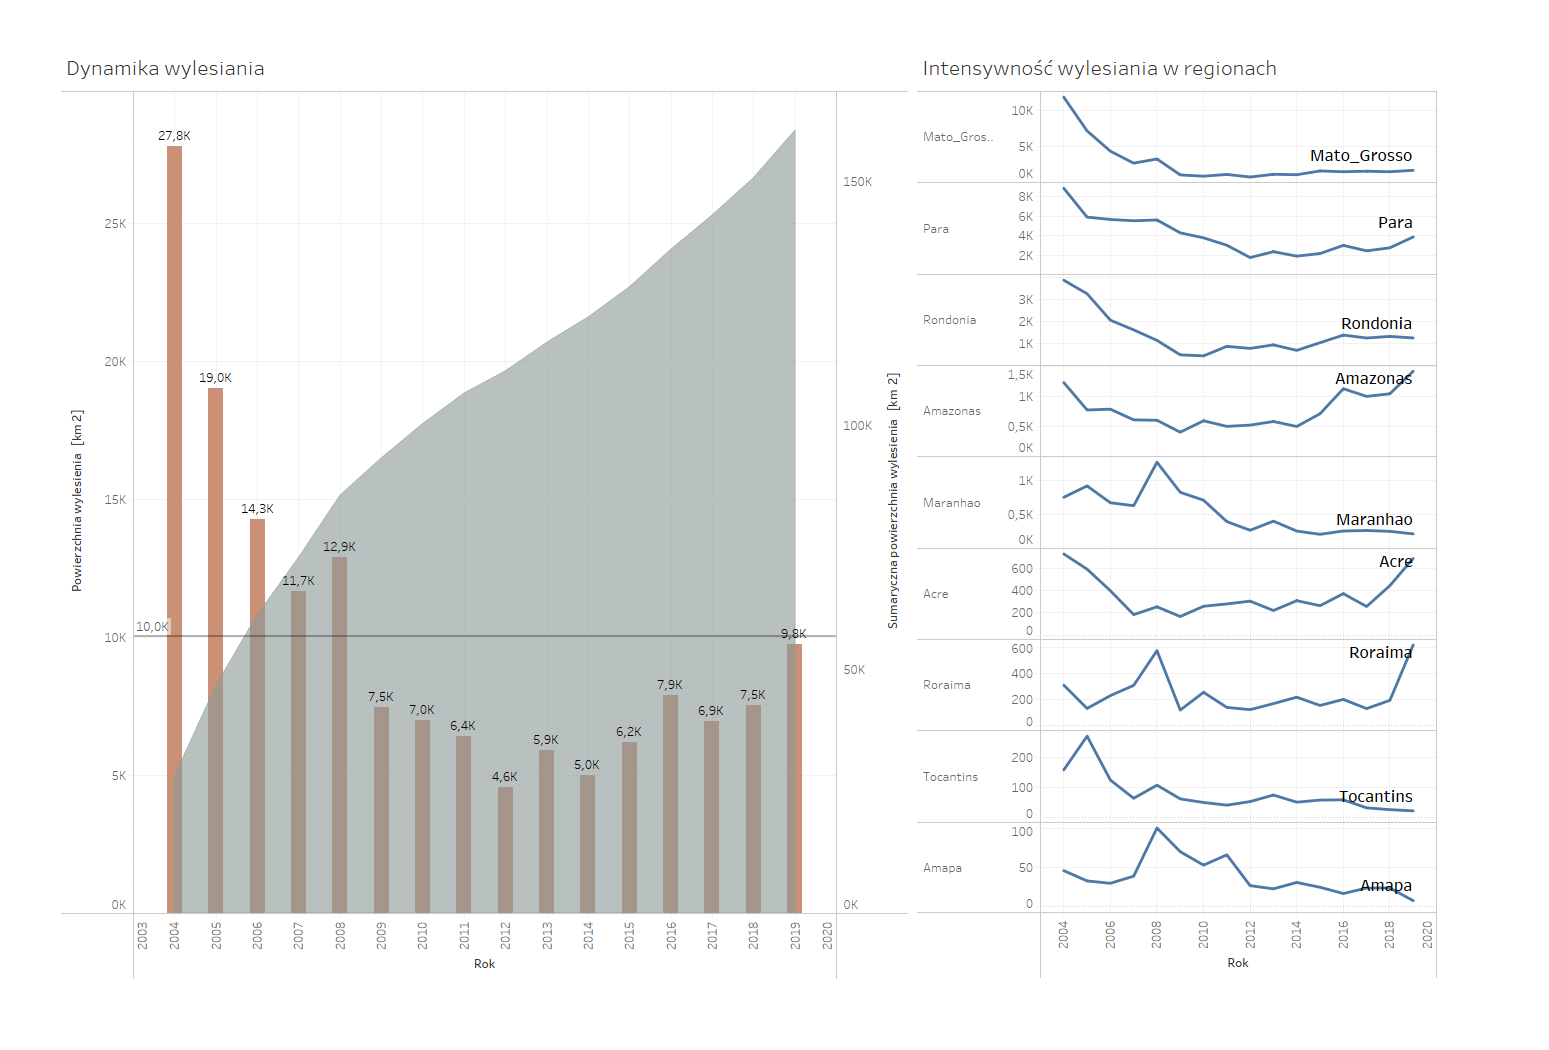

#### Insights:
- most intense deforestation in 2004 and than steadily decreasing
- more or less stable between 2009-2018
- increase in deforestation since 2018 in Amazonas, Para, Acre, Roraima

#### Fires

Map Chart made in Tableau showing intensity and localization of firespots between 1999 and 2019


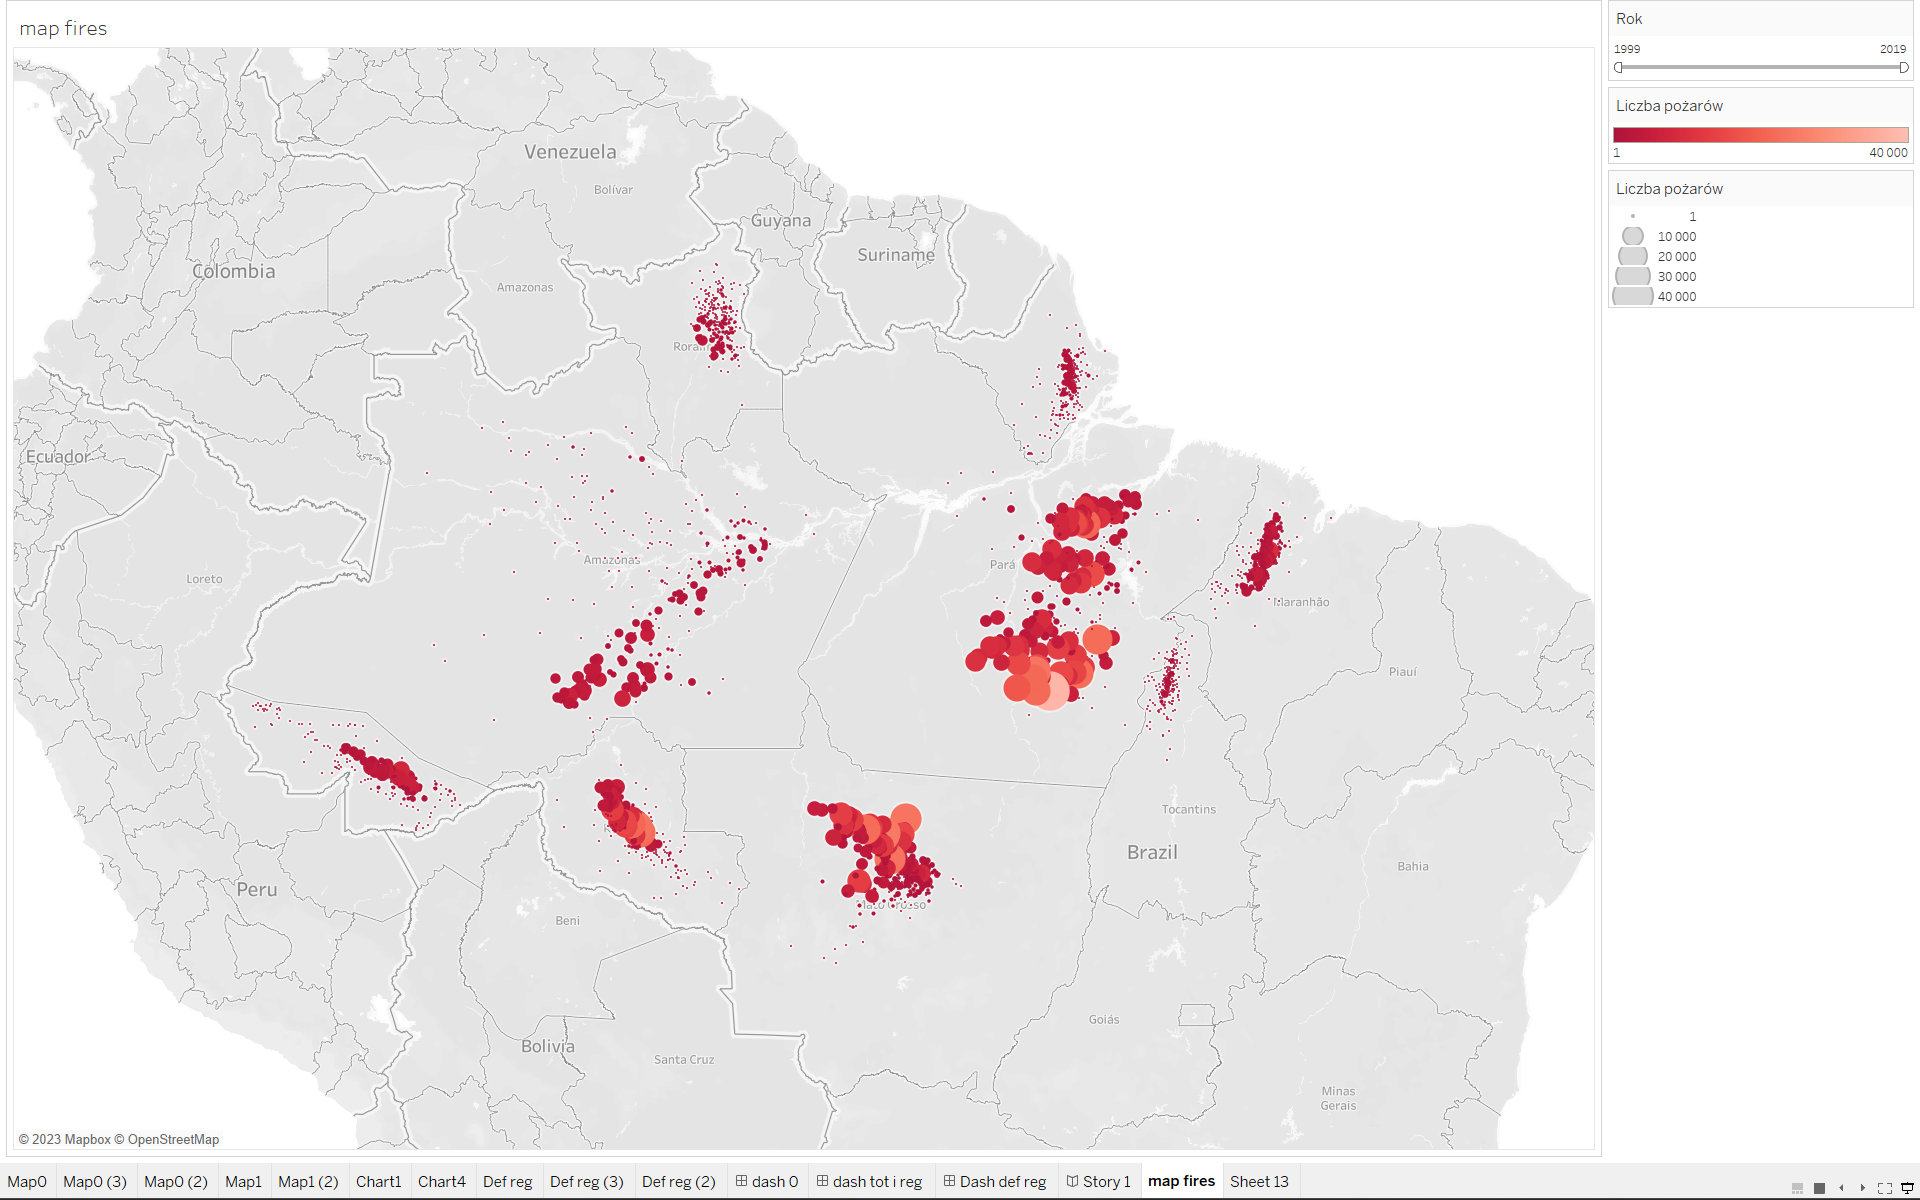

Insights:

- most intense fires aggregated around agglomertions
- states with most intense fires Para, Mato Grosso, Rondonia, so the same states with intense deforestation

In [75]:
grouped_state = df_all.groupby('state')['fires'].sum().sort_values(ascending=False)
grouped_state

state
Para           715125
Mato Grosso    398410
Rondonia       253164
Amazonas       164887
Maranhao       111044
Acre           106357
Roraima         37152
Amapa           31437
Tocantins        9697
Name: fires, dtype: int32

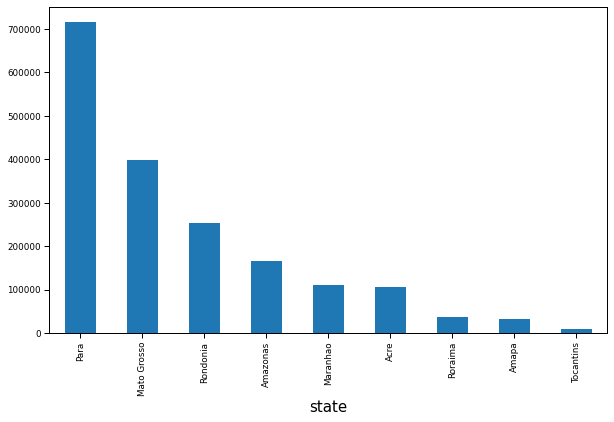

In [79]:
plt.figure(figsize=(10,6))

grouped_state.plot(kind ='bar')
plt.show()

In [35]:
grouped2 = df_all.groupby('year')['fires'].sum()

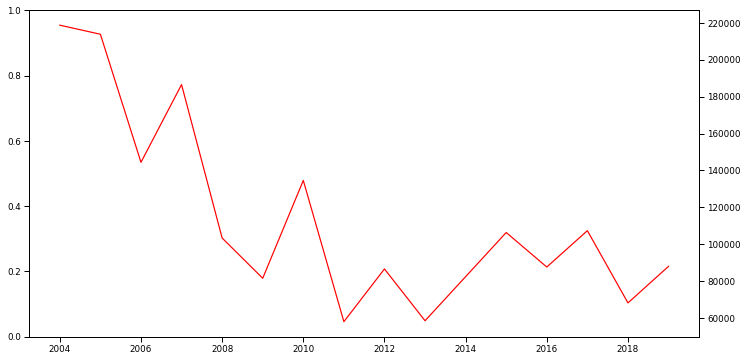

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":15})
#grouped.plot(kind='bar', y='def_area', title='Intensity of deforestation 2004-2019',ax=ax, xlabel ='Years', ylabel = 'Deforested area [km 2]', fontsize = 10)
ax2 = ax.twinx()
grouped2.plot(kind ='line', secondary_y = True, ax=ax2, color = 'red')
plt.show()

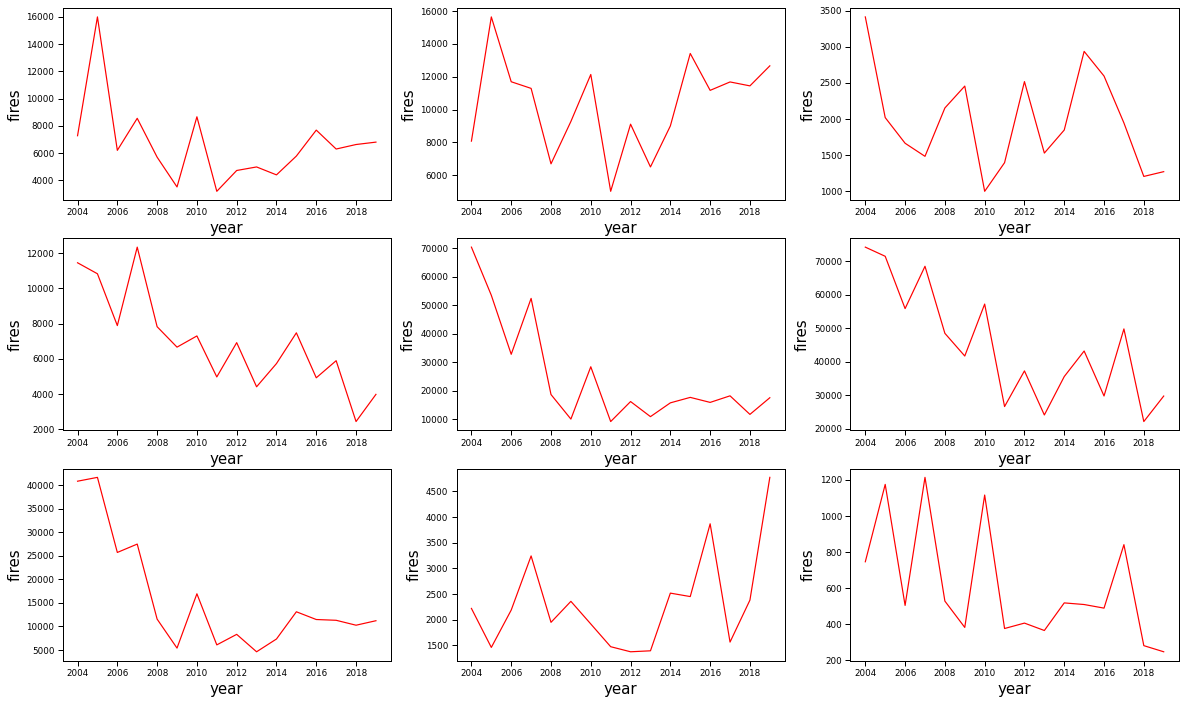

In [50]:
values = ['Acre', 'Amazonas', 'Amapa', 'Maranhao','Mato Grosso','Para',\
                  'Rondonia','Roraima', 'Tocantins']

plt.figure(figsize=(20,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.lineplot(data = df_all[df_all["state"] == values[i]], x='year', y='fires', color ='red')
    #set_ylabel(values[i],fontsize=20)
    #axes.set_title(values[i],fontsize=50)
plt.show()

Map Charts made in Tableau showing:
1) intensity of total deforestation each year between 2004-2019 and number of fires
2) intensity of deforestation in each region each year between 2004-2019 and number of fires


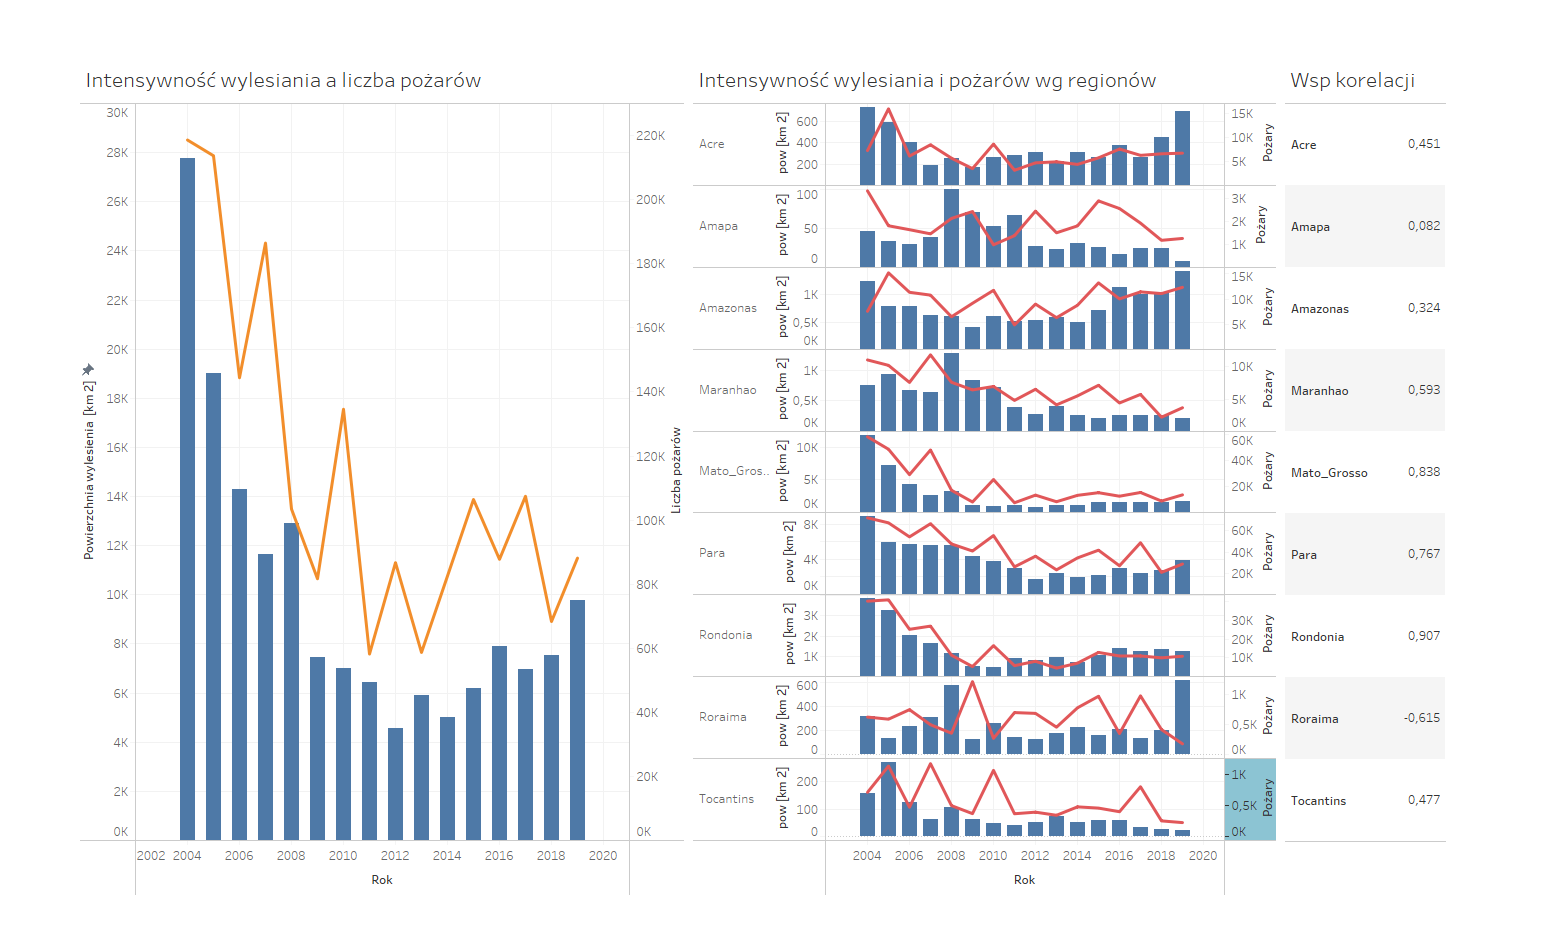

Insights:

- strong correlation between number of fires and deforestation at 0.906
- states with strongest correlation coefficients between deforestation and number of fires are notorious:
    - Rondonia (0.907), Mato Grosso (0,838) and Para(0,767)



<AxesSubplot: xlabel='def_area', ylabel='fires'>

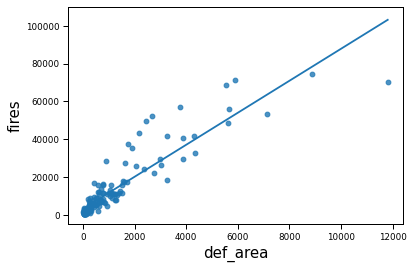

In [51]:
from scipy.stats import pearsonr
sns.regplot(data =df_all, x ='def_area', y='fires', ci=0)

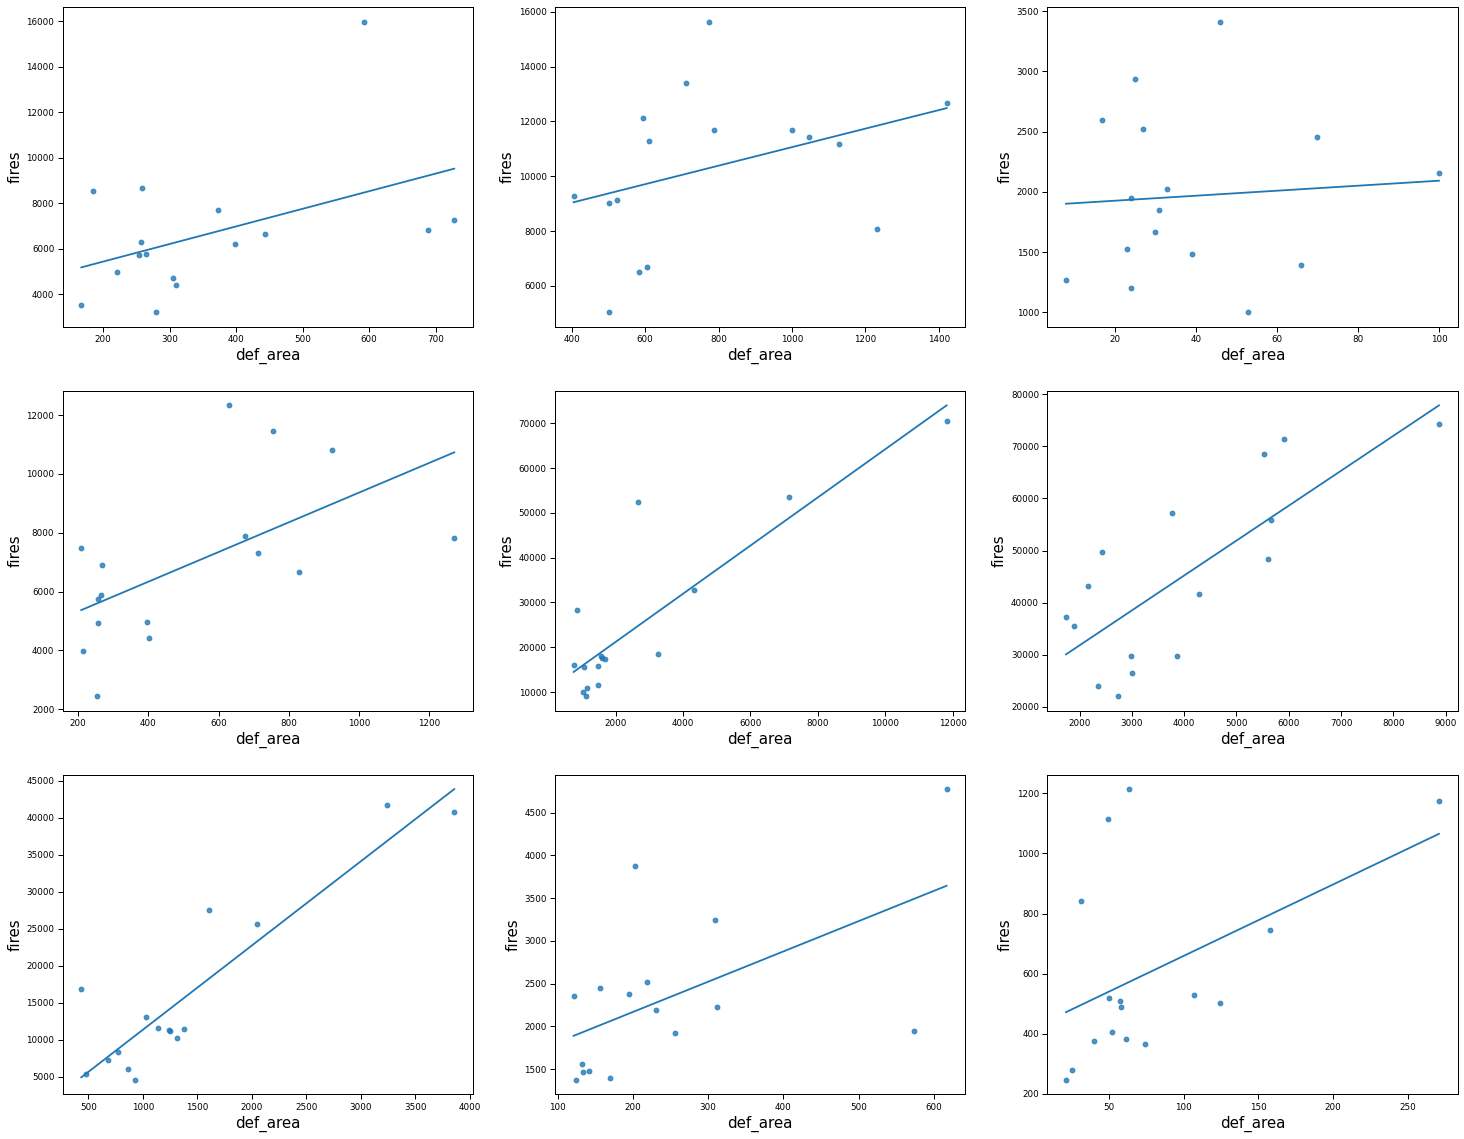

In [52]:
values = ['Acre', 'Amazonas', 'Amapa', 'Maranhao','Mato Grosso','Para',\
                  'Rondonia','Roraima', 'Tocantins']

plt.figure(figsize=(25,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.regplot(data = df_all[df_all["state"] == values[i]], x='def_area', y='fires', ci=0)
    #set_ylabel(values[i],fontsize=20)
    #axes.set_title(values[i],fontsize=50)
plt.show()

In [40]:
df_all[['def_area','fires']].corr()

,def_area,fires
def_area,1.000000,0.906022
fires,0.906022,1.000000


In [59]:
df_all.groupby('state')[['def_area','fires']].corr()

def_area     fires
state                                   
Acre        def_area  1.000000  0.450937
            fires     0.450937  1.000000
Amapa       def_area  1.000000  0.072386
            fires     0.072386  1.000000
Amazonas    def_area  1.000000  0.362101
            fires     0.362101  1.000000
Maranhao    def_area  1.000000  0.584515
            fires     0.584515  1.000000
Mato Grosso def_area  1.000000  0.866744
            fires     0.866744  1.000000
Para        def_area  1.000000  0.766345
            fires     0.766345  1.000000
Rondonia    def_area  1.000000  0.906242
            fires     0.906242  1.000000
Roraima     def_area  1.000000  0.562739
            fires     0.562739  1.000000
Tocantins   def_area  1.000000  0.472770
            fires     0.472770  1.000000

#### El Nino/La Nina

In [41]:
df_nino = df_all[df_all['phenomenon']=='El Nino']
df_nina = df_all[df_all['phenomenon']=='La Nina']

df_nino[['def_area','severity']].corr()

,def_area,severity
def_area,1.000000,-0.150139
severity,-0.150139,1.000000


In [42]:
df_nino[['fires','severity']].corr()

,fires,severity
fires,1.000000,-0.066008
severity,-0.066008,1.000000


In [43]:
df_nina[['def_area','severity']].corr()

,def_area,severity
def_area,1.000000,0.086751
severity,0.086751,1.000000


In [44]:
df_nina[['fires','severity']].corr()

,fires,severity
fires,1.000000,-0.065164
severity,-0.065164,1.000000
